In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top = Table.read_table('top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
studio_distribution = studios.group('Studio')

In [5]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [6]:
sum(studio_distribution.column(1))

200

## Bar Charts ##

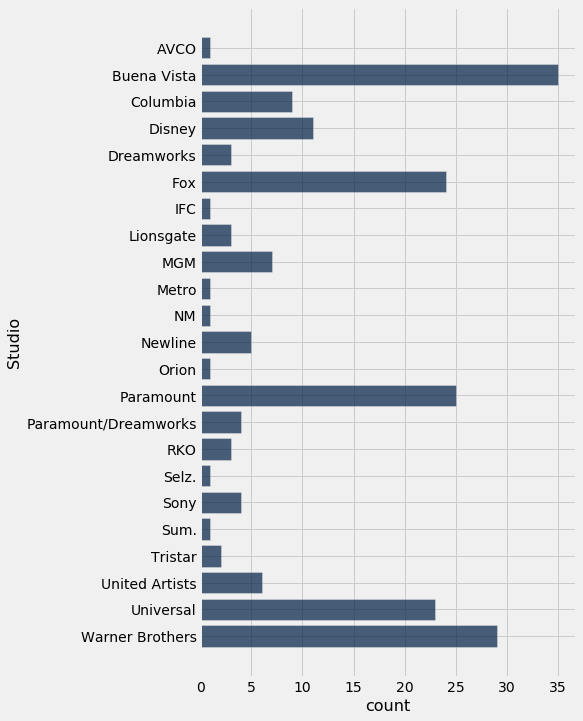

In [36]:
studio_distribution.barh('Studio')

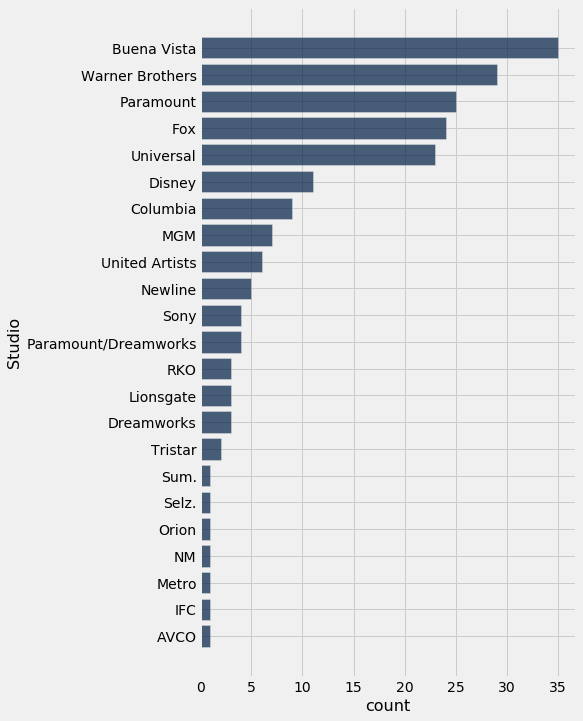

In [37]:
studio_distribution.sort(1, descending=True).barh(0)

## Numerical Distribution ##

In [7]:
ages = 2019 - top.column('Year')
top = top.with_column('Age', ages)

In [8]:
top

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,80
Star Wars,Fox,460998007,1583483200,1977,42
The Sound of Music,Fox,158671368,1266072700,1965,54
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,37
Titanic,Paramount,658672302,1204368000,1997,22
The Ten Commandments,Paramount,65500000,1164590000,1956,63
Jaws,Universal,260000000,1138620700,1975,44
Doctor Zhivago,MGM,111721910,1103564200,1965,54
The Exorcist,Warner Brothers,232906145,983226600,1973,46
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,82


## Binning ##

In [ ]:
#Binning is counting the number of numerical values that lie within ranges, called bins
#Bins are defined by their lower bounds
#the upper boud is the lower bound of the next bin
#In terms of math it looks like this (included)[0, 1)(not included)

In [9]:
min(ages), max(ages)

(2, 98)

In [38]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [40]:
top.bin('Age', bins=my_bins) #Uses the my binds array to define the bin sections

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [11]:
binned_data = top.bin('Age', bins = my_bins) 
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [41]:
sum(binned_data.column('Age count'))

200

In [12]:
sum(binned_data.column(1))

200

In [43]:
top.bin('Age', bins=np.arange(0, 101, 25))

bin,Age count
0,91
25,67
50,35
75,7
100,0


In [13]:
top.bin('Age', bins = np.arange(0, 101, 25)) #This one does not include the age 50 in the [25,50)

bin,Age count
0,91
25,67
50,35
75,7
100,0


In [44]:
top.bin('Age', bins=np.arange(0,60,25)) #This one includes the age 50 as [25,50)

bin,Age count
0,91
25,68
50,0


In [15]:
top.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Age
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,50


## Histograms ##

In [16]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [17]:
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [18]:
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [19]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


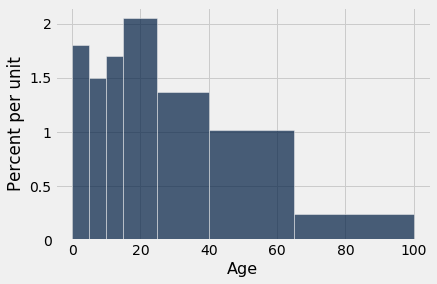

In [45]:
top.hist('Age', bins = my_bins)

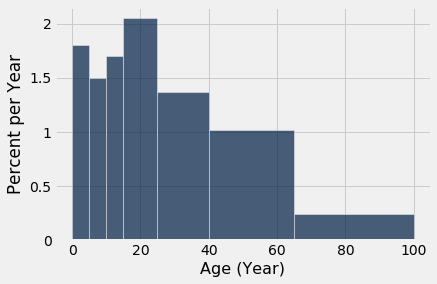

In [20]:
top.hist('Age', bins = my_bins, unit = 'Year')

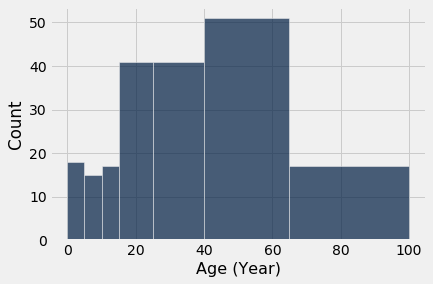

In [21]:
# What *NOT* to do:
top.hist('Age', bins = my_bins, unit = 'Year', normed = False)

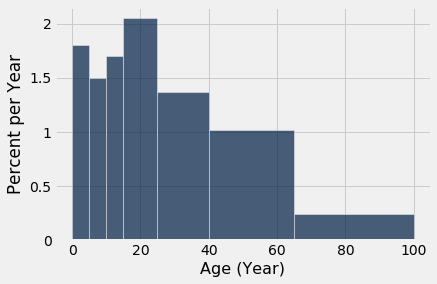

In [22]:
top.hist('Age', bins = my_bins, unit = 'Year')

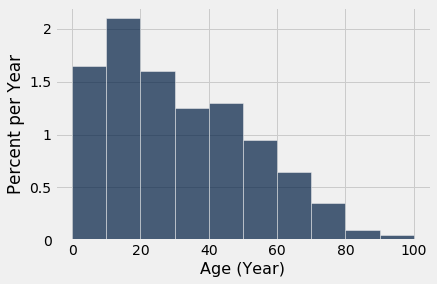

In [23]:
top.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year') #choice of bins affect the shape of the histogram

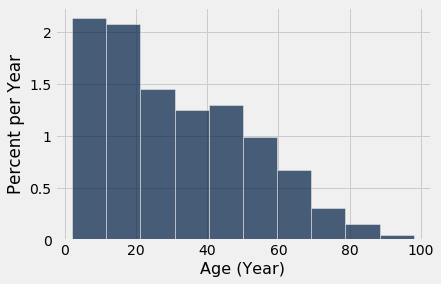

In [24]:
top.hist('Age', unit='Year')

## Height ##

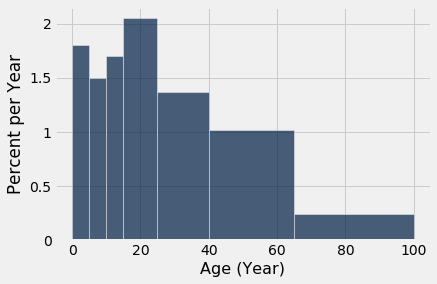

In [25]:
top.hist('Age', bins = my_bins, unit = 'Year')

In [26]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


In [46]:
#25-40 bin
percent =20.5
width = 40-25

In [47]:
# Area of rectangle = height * width

height = percent / width
height

1.3666666666666667

In [ ]:
#1.366 means if you look at the 40-65 bin it shows how many poeple per unit x-axis

In [30]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


In [31]:
widths = np.diff(binned_data.column('bin'))
len(widths)

7

In [32]:
binned_data.num_rows

8

In [33]:
binned_data = binned_data.take(np.arange(binned_data.num_rows - 1))
binned_data = binned_data.with_column(
    'Height', binned_data.column('Percent') / widths)

In [34]:
binned_data

bin,Age count,Percent,Height
0,18,9,1.8
5,15,7.5,1.5
10,17,8.5,1.7
15,41,20.5,2.05
25,41,20.5,1.36667
40,51,25.5,1.02
65,17,8.5,0.242857


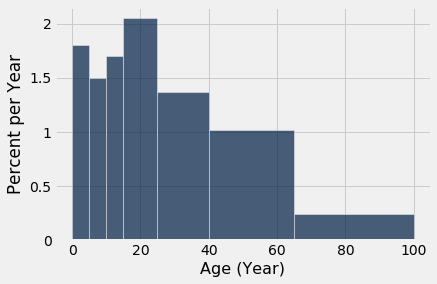

In [35]:
top.hist('Age', bins = my_bins, unit = 'Year')